In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [2]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem
from astropy.timeseries import LombScargle

In [4]:
lightcurve_ztf = Table.from_pandas(pd.read_csv("J210017.csv"))

In [5]:
row = lightcurve_ztf
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [6]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [15]:
ideal_frequency = np.linspace(6.8, 7, 10**6) * (1/u.day)

In [16]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

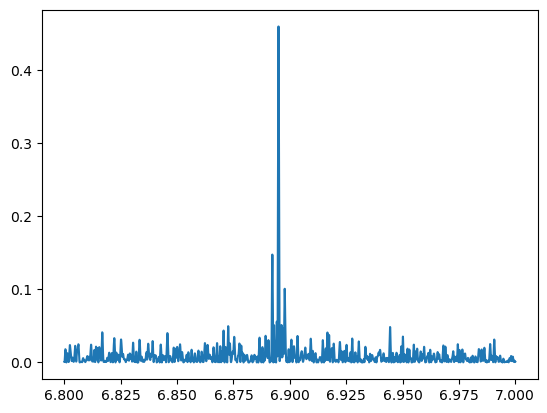

In [17]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [18]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.14503334 d>

Text(0, 0.5, 'R Mag')

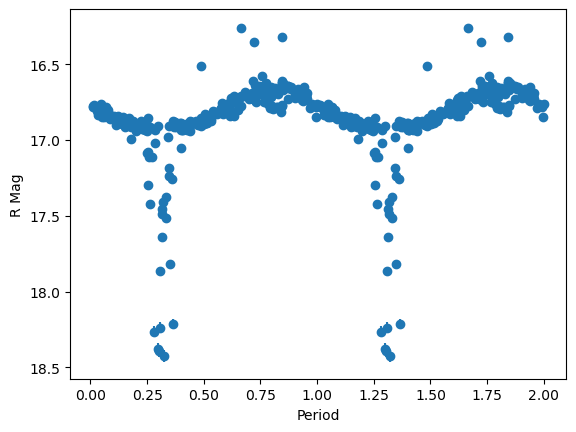

In [29]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
#plt.xlim(0.2,0.45)
#plt.ylim(16.7, 18.5)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

In [24]:
eclipsing = lightcurve_ztf[np.argmin(lightcurve_ztf["mag"])]
eclipsing

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64
338213400000339,178315129,2459537.650156892,59537.1512963,16.2594414,0.0127099603,32768,zr,315.0725408,-14.190276,0.428000003,0.2460000068,20211119151296,338,13,4,16.0799999,24.1902122,0.0826379582,0.1521694809,0.007230571937,30.0,2.37299991,1


In [25]:
primary_eclipse_time = Time(eclipsing["mjd"], format='mjd')
orbital_period = ztf_p
eclipse_duration = 0.1 * ztf_p

In [26]:
objects = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='J163045')

In [27]:
observing_time = Time('2023-05-05 8:00')
objects.next_primary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 10:10:02.797' '2023-05-05 13:38:53.677'
 '2023-05-05 17:07:44.557' '2023-05-05 20:36:35.438'
 '2023-05-06 00:05:26.318' '2023-05-06 03:34:17.198'
 '2023-05-06 07:03:08.079' '2023-05-06 10:31:58.959']>

In [28]:
objects.next_secondary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 08:25:37.356' '2023-05-05 11:54:28.237'
 '2023-05-05 15:23:19.117' '2023-05-05 18:52:09.997'
 '2023-05-05 22:21:00.878' '2023-05-06 01:49:51.758'
 '2023-05-06 05:18:42.638' '2023-05-06 08:47:33.519']>